
# Project: Investigate a Dataset - [Tmdb-movies dataset]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue. 
Column names and their signifiance
id- Unique identification of each movie data
imdb_id- Unique identification of each internet movie database
popularity- How popular the movie is among viewers
budget- The amount invested in the production of each movie
revenue- The amount generated from the movie
original_title - Title of the movie
cast- Actors featured
homepage- the link to more information about the movie data
Director- Director of the movie
taglines - Clarity on the idea behind  the movie
keywords - Searchwords on the movie
overview - Plot of the movie
runtime - movie runtime
genres- movie genre
production_company- Company producing the movie
release_date- Movie release date
vote_count- Vote counts
vote_average- Average vote count
release_year- Year movie was released
budget_adj- budget in terms of 2010 dollars
revenue_adj- revenue in terms of 2010 dollars


### Question(s) for Analysis
Question 1: What genre is associated with high revenue?
Question 2: Which genres are most popular year to year?


In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html


In [2]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

Requirement already up-to-date: pandas==0.25.0 in /opt/conda/lib/python3.6/site-packages (0.25.0)


<a id='wrangling'></a>
## Data Wrangling



In [3]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df_movies = pd.read_csv('Database_TMDb_movie_data/tmdb-movies.csv', sep=',')
df_movies.head(2)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08


Summary Statistics of the Dataset

In [4]:
#datatypes
df_movies.dtypes


id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

In [5]:
#descriptive statistics
df_movies.describe()


,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [6]:
#Summary of dataframe
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [7]:
#number of rows and columns
df_movies.shape

(10866, 21)


### Data Cleaning


In [8]:

df_movies.drop(['id', 'imdb_id', 'original_title', 'cast', 'homepage', 'tagline', 'keywords', 'overview'], axis=1, inplace=True)
df_movies.head(2)

,popularity,budget,revenue,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000,378436354,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08


I dropped the columns i won't be using to answer questions i have regarding this datset.
I will also be dropping missing columns in the next cell.

In [9]:
df_movies.isnull().sum()

popularity                 0
budget                     0
revenue                    0
director                  44
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

 viewing missing row count for the remaining features/columns

In [10]:
df_movies.fillna(method = 'ffill', axis = 0, inplace=True)

In [11]:
df_movies.isnull().sum().any()

False

Replacing rows with any null values with 0 and  confirming if any of columns in the datset have null values

After dropping the missing rows, next in the data cleaning process is to remove duplicates

In [12]:
#Checking for duplicates
print(df_movies.duplicated().sum())

1


In [13]:
# drop duplicates
df_movies.drop_duplicates(inplace=True)

In [14]:
#Confirm dropped duplicates
print(df_movies.duplicated().sum())

0


Next, I check for incorrect data types

In [15]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 13 columns):
popularity              10865 non-null float64
budget                  10865 non-null int64
revenue                 10865 non-null int64
director                10865 non-null object
runtime                 10865 non-null int64
genres                  10865 non-null object
production_companies    10865 non-null object
release_date            10865 non-null object
vote_count              10865 non-null int64
vote_average            10865 non-null float64
release_year            10865 non-null int64
budget_adj              10865 non-null float64
revenue_adj             10865 non-null float64
dtypes: float64(4), int64(5), object(4)
memory usage: 1.2+ MB


In [16]:
df_movies.head(2)

,popularity,budget,revenue,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000,378436354,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08


I would split the genre column since there are more than a value in each row separated by pipes


In [17]:
df_movies['genres'] = [genre[0] for genre in df_movies['genres'].str.split('|')]
df_movies.head(2)

,popularity,budget,revenue,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Colin Trevorrow,124,Action,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000,378436354,George Miller,120,Action,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08


Splitted the genre column to show only the first value


<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1 (What genre is associated with high revenue?)

The significance of this question is to know the kind of genre that is profitable to the production company and the kind of movies they should focus more on producing in the future.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa5bf640390>,
      dtype=object)

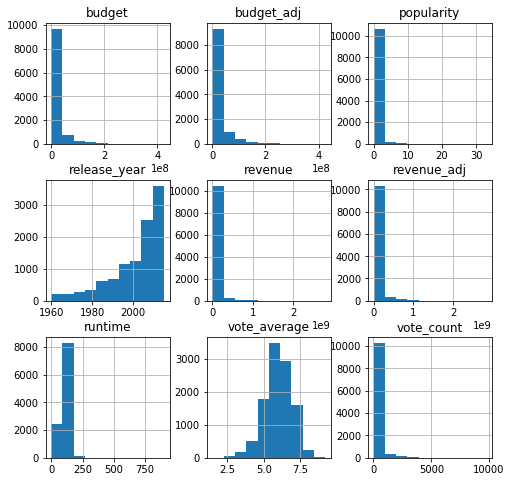

In [18]:
df_movies.hist(figsize=(8,8))

Single variable analysis

From the single variable analysis above, there were more movies from 2000.

In [19]:
revenue_by_genres = df_movies.groupby('genres')['revenue'].sum().sort_values()
revenue_by_genres

genres
Foreign                      0
TV Movie              42000000
Documentary          852211592
Western             1305819749
History             1951867180
Music               2304615926
War                 2708551908
Mystery             3019881629
Romance             7046888501
Family              8854452778
Crime              12705800478
Thriller           13003269735
Horror             15432626119
Science Fiction    17046401611
Fantasy            18303948327
Animation          28797048213
Drama              61678301024
Comedy             67952461496
Adventure          73107006764
Action             96606072845
Name: revenue, dtype: int64

To know the genre with the highest revenue, i would plot a bar chart of genres against revenue

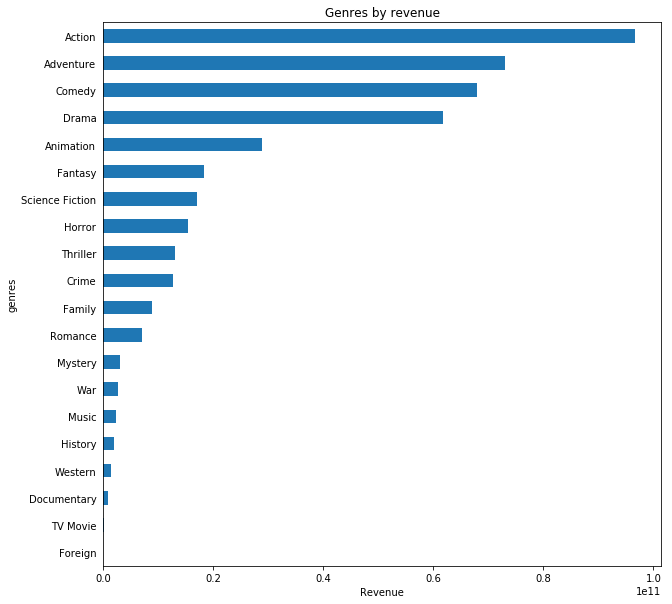

In [20]:
#setting fig size
fig, ax = plt.subplots()
#Horizontal bar plot
revenue_by_genres.plot(kind='barh', title = 'Genres by revenue',  figsize=(10,10))
#setting x and y labels
plt.ylabel('genres')
plt.xlabel('Revenue')
#removing ticks from the y-axis
ax.yaxis.set_ticks_position('none')

I calculated the sum of each revenue based on each group of genre over the years and from the graph above, the bars of action and adventure are the longest with a revenue of almost 1 trillion dollars.

From the visualization above, I suppose action and adventure movies are most preferred by people, hence generates the highest revenue.

### Research Question 2  (What genre are most popular year to year?)

The aim of this question is to know viewer's movie preferences as the year goes by and why their preference might change over time.

In [21]:
mean_popularity = df_movies['popularity'].mean()


I will group the popularity column into two values; popular and not popular by basing if it is greater than the mean or not by craeting a variable; mean_popularity

In [22]:
df_movies['popularity_scale'] = df_movies['popularity'].apply(lambda x:'popular' if x > mean_popularity else 'not popular')
df_movies['popularity_scale'].sample(3)

768         popular
2945        popular
2313    not popular
Name: popularity_scale, dtype: object

I used a lambda function to group this to avoid repetitive values and viewed three random rows

In [23]:
popularity_count = df_movies['popularity_scale'].value_counts()
popularity_count

not popular    7805
popular        3060
Name: popularity_scale, dtype: int64

I counted the two values which showed that non- popular movies were more than popular movies by creating a variable; popularity_count.

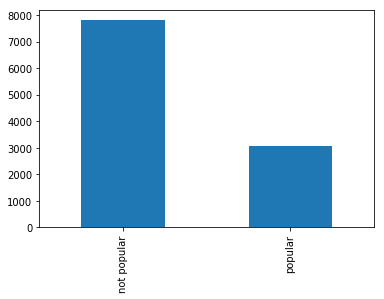

In [24]:
popularity_count.plot.bar()

The bar chart also showed that they were less popular and more non-popular movies

In [25]:
df_movies['genres'].nunique()

20

I counted the genres to know how many unique values are present in the dataset

In [26]:
movie_count = df_movies['genres'].value_counts()
movie_count

Drama              2459
Comedy             2324
Action             1591
Horror              916
Adventure           586
Thriller            492
Documentary         433
Animation           404
Crime               382
Fantasy             272
Science Fiction     216
Romance             186
Family              145
Mystery             125
Music               100
TV Movie             79
War                  59
History              44
Western              43
Foreign               9
Name: genres, dtype: int64

I counted each unique value with Drama having the most count and Foreign movies having the least count

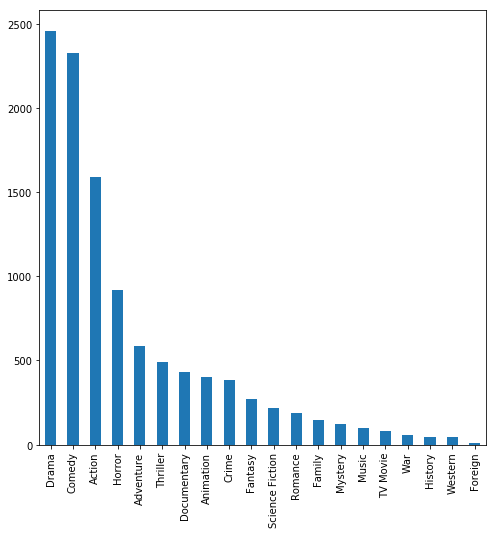

In [27]:
movie_count.plot.bar(figsize=(8,8))

The bar chart above also confirms this insight.

Text(0.5,1,'Boxplot of popularity count')

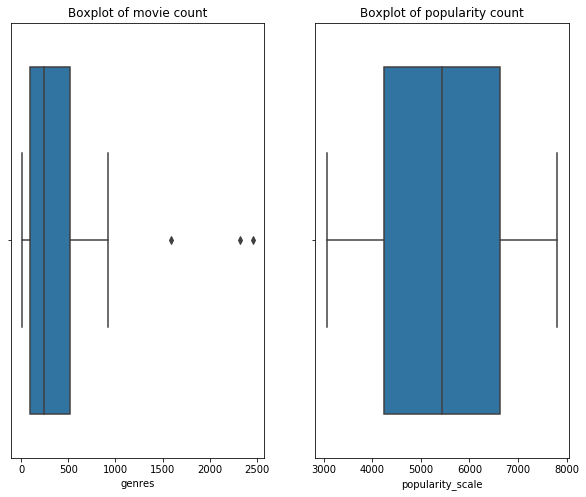

In [28]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,8))
sns.boxplot(x=movie_count, data= df_movies.tail(10), ax = ax[0])
sns.boxplot(x=popularity_count, data= df_movies.tail(10), ax = ax[1])
ax[0].set_title('Boxplot of movie count')
ax[1].set_title('Boxplot of popularity count')

The box plots shows the presence of outliers in the movie count using seaborn library.
I used the last 10 values in the dataset to avoid clumping in the graph.

In [29]:
popularity_by_movies = df_movies.groupby(['release_year', 'genres'],  as_index= False)[('popularity')].mean()
popularity_by_movies.tail(10)

,release_year,genres,popularity
819,2015,History,0.879763
820,2015,Horror,0.474315
821,2015,Music,0.386850
822,2015,Mystery,0.989721
823,2015,Romance,0.856222
824,2015,Science Fiction,1.296113
825,2015,TV Movie,0.311897
826,2015,Thriller,0.628346
827,2015,War,2.131503
828,2015,Western,4.929120


Grouping by release year and genres, i aim to plot a graph showing the popularity of movies from 2010 to 2015.
This is also to know the popularity of the last 5 years and it is also easier to plot.

Text(0,0.5,'Popularity')

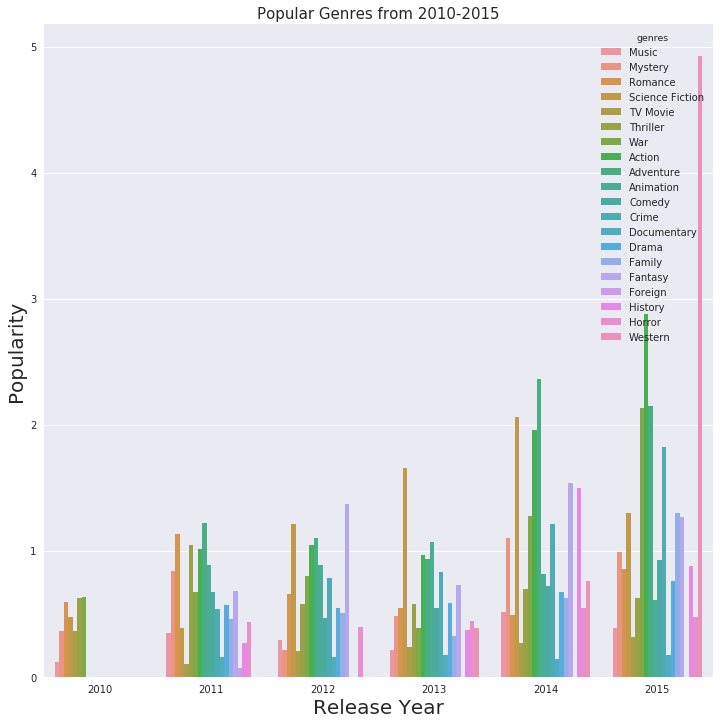

In [31]:
#creating a function p
p = sns.barplot(x='release_year', y= 'popularity', hue='genres', data= popularity_by_movies.tail(100))
#set the figure size
sns.set(rc = {'figure.figsize':(12,12)})
#set the title and font size of the title
p.set_title('Popular Genres from 2010-2015', fontsize = 15)
#set x and y labels
p.set_xlabel('Release Year', fontsize = 20)
p.set_ylabel('Popularity', fontsize = 20)


- Western movies were not popular at first in 2010 with a popular score of almost 0, but started beccoming popular with a popular score of approximately 5 as the years went by, with it being the most popular among viewers in 2015.
- This could be because more people are interested in events that had taken place in the earlier century.

From the plot above, western, action and adeventural movies are  the most popular while horror, musical and mystery movies are the least popular.

<a id='conclusions'></a>
## Conclusions

## Submitting your Project 

In conclusion, upon analyzing this dataset,
1. Production companies should produce more of Action, Adventural and Comedy movies as it generates more revenue although Comedy movies are not as popular as the former two.
2. Western movies were the most popular from 2010-2015 but seem to generate low revenue and additional research should be done on this.



# Limitations

1. 23 values were missing in the genre column in this dataset and it could be any value which could have affected the insight generated from this analysis.
2. I based my analysis on the last 5 years and it could be prone to sample bias and not be representative of the whole dataset
3. i filled the missing values with 0 so it might have affected the analysis which could have ben a single genre not represented properly.
4. Western movies seemed to be low in count which could be due to the missing values present in the dataset prior to visualization which might have influenced the visualization count.

In [32]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0